In [9]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='browser'
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [10]:
density_data = pd.read_csv("../Curated_data/density_predictors.csv", low_memory=False)
density_data2 = density_data.drop(columns = 'Name')

In [11]:

density_data2 = density_data2.dropna(subset=['Density_gcm3'])

In [12]:
density_data2.describe()

,Y,Density_gcm3,RQD_Pct,Weathering,Al_pct,B_ppm,Ba_ppm,Ca_pct,Cr_ppm,IP_pct,...,Y_ppm,Alt1_Int_wk,Sulph1_Code_PO,Sulph2_Code_CP,Sulph2_Code_PO,X,Z,CP_Total,PO_Total,PY_Total
count,1.854600e+04,18546.000000,10264.000000,8695.000000,2399.000000,1224.000000,2442.000000,2423.000000,16646.000000,14416.000000,...,2331.000000,18546.000000,18546.000000,18546.000000,18546.000000,1.854600e+04,18546.000000,2618.000000,2618.000000,2618.000000
mean,7.512068e+06,3.142281,89.298440,2.961357,1.056719,2.233791,33.386204,1.224928,426.794825,14.306924,...,2.128258,0.151731,0.272242,0.155775,0.009921,3.499032e+06,-26.939892,0.753591,1.525634,0.093079
std,3.999557e+02,0.176897,15.570922,0.234989,1.744812,1.664447,31.233643,1.825684,282.936751,22.101604,...,3.401083,0.358769,0.445126,0.362652,0.099113,3.530326e+02,201.694048,0.852886,1.339271,0.438227
min,7.510614e+06,1.890000,1.000000,1.000000,0.110000,0.110000,0.110000,0.110000,2.160000,0.110000,...,0.110000,0.000000,0.000000,0.000000,0.000000,3.497742e+06,-907.830000,0.000000,0.000000,0.000000
25%,7.511755e+06,3.060000,87.500000,3.000000,0.350000,0.910000,14.870000,0.310000,206.400000,2.300000,...,0.350000,0.000000,0.000000,0.000000,0.000000,3.498839e+06,-130.010000,0.100000,0.350000,0.000000
50%,7.512164e+06,3.140000,95.050000,3.000000,0.500000,1.960000,25.575000,0.500000,354.000000,4.570000,...,0.840000,0.000000,0.000000,0.000000,0.000000,3.499012e+06,14.275000,0.300000,1.235000,0.000000
75%,7.512350e+06,3.210000,98.000000,3.000000,0.690000,3.170000,42.197500,1.140000,581.000000,13.740000,...,1.980000,0.000000,1.000000,0.000000,0.000000,3.499265e+06,126.732500,1.000000,2.000000,0.000000
max,7.512892e+06,4.650000,100.000000,4.000000,8.930000,13.240000,460.000000,20.260000,2477.500000,100.000000,...,22.920000,1.000000,1.000000,1.000000,1.000000,3.499878e+06,238.450000,4.000000,15.000000,5.000000


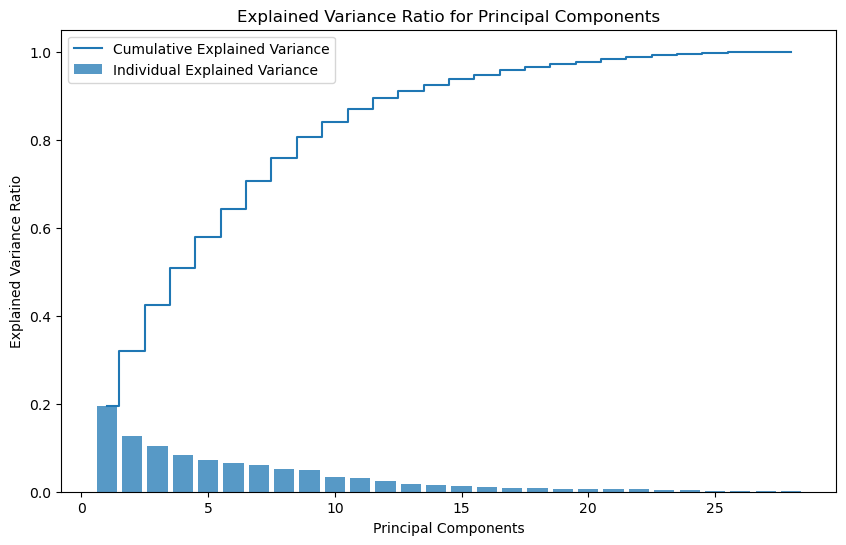

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
variables_of_interest = 'Density_gcm3'
# Extract features (excluding the variables to keep)
features = density_data2.drop(columns=variables_of_interest)

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

#Fill NAs
features_filled = np.nan_to_num(features_standardized, nan=0)


# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_filled)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, len(features.columns)+1)])

# Plot the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_explained_var = explained_var_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.75, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_var_ratio) + 1), cumulative_explained_var, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.legend()
plt.show()


In [14]:
pc_df['Density_gcm3'] = density_data['Density_gcm3']
pc_df['Name'] = density_data['Name']

In [15]:
mineral = 'Density_gcm3'
pc_df = pc_df.dropna(subset=[mineral])

In [16]:
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,Density_gcm3,Name
353,-0.385195,-0.334733,1.291264,-0.679829,-0.371404,0.034626,0.765698,0.177135,0.185760,0.472845,...,-0.016876,0.004089,-0.003524,0.015009,-0.020636,0.013426,-0.000721,-0.019084,2.22,KV-NME001
354,-1.640130,0.351173,1.070043,-0.239711,-0.918690,0.310305,0.999721,-0.050816,-0.082853,0.455510,...,-0.061980,0.024551,0.009127,0.028810,-0.011921,0.025154,-0.018840,-0.023357,2.77,KV-NME001
355,-1.613062,0.309918,0.975306,-0.242381,-0.792001,0.303304,0.907356,-0.013626,-0.141645,0.405594,...,-0.056656,0.023036,0.007839,0.026334,-0.011374,0.022884,-0.017658,-0.021677,3.17,KV-NME001
356,-1.472989,0.091974,0.562950,-0.183245,-0.245573,0.521515,0.527247,0.373089,-0.842190,-0.073423,...,-0.047466,0.027233,0.004585,0.028486,-0.013547,0.015860,-0.020391,-0.018521,3.25,KV-NME001
357,-1.364619,-0.065630,0.049431,-0.352777,0.437006,0.200906,-0.004764,0.323070,-0.656122,-0.041999,...,-0.001415,0.007992,-0.005723,-0.000253,-0.005324,0.000378,-0.004290,-0.004764,3.06,KV-NME001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17008,-2.177279,0.364998,1.770308,-0.646797,-1.571374,1.151375,1.831238,0.389066,-0.765254,-0.210122,...,0.019847,-0.057419,-0.402999,-0.286461,0.208566,0.013412,0.059391,0.223974,3.12,KV165
17009,-2.058923,0.102952,1.060362,-0.875562,-0.666701,0.717418,1.116175,0.345595,-0.497703,-0.168463,...,0.394333,0.098015,-0.623269,-0.376014,-0.166216,-0.216858,0.266021,0.119789,3.08,KV165
17010,-2.014696,0.115460,0.979188,-0.899623,-0.507175,0.636041,1.010419,0.292601,-0.516239,-0.069575,...,0.509117,0.114355,-0.695361,-0.235740,-0.188050,-0.316323,0.270354,0.120109,3.09,KV165
17011,-1.973914,0.175265,0.957386,-0.897666,-0.384471,0.586635,0.941984,0.262413,-0.541625,0.029854,...,0.387649,0.123669,-0.609235,-0.288423,-0.144501,-0.316259,0.295420,0.137574,3.02,KV165


In [17]:
covariates = pc_df.iloc[:, :-2].columns
covariates = covariates[:3]
deposit_data = pc_df

In [18]:
covariates = covariates.tolist()

# Display the list
print(covariates)

['PC1', 'PC2', 'PC3']


- Iteration 0, MSE: 0.6208


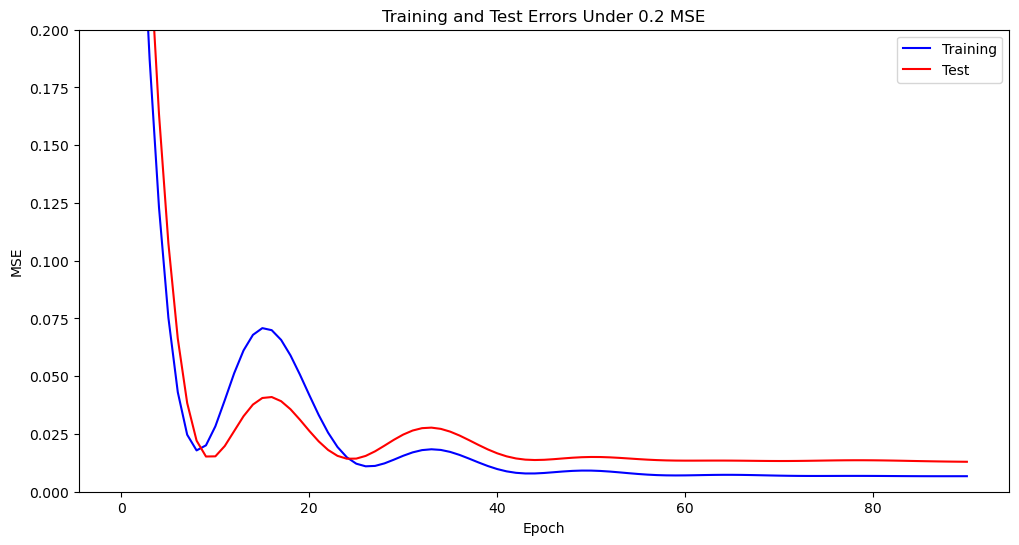

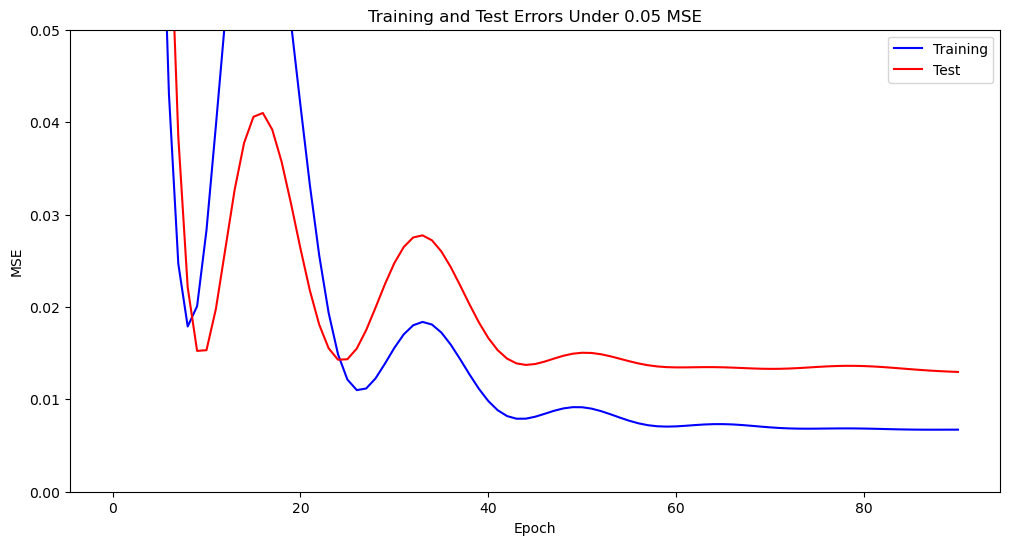

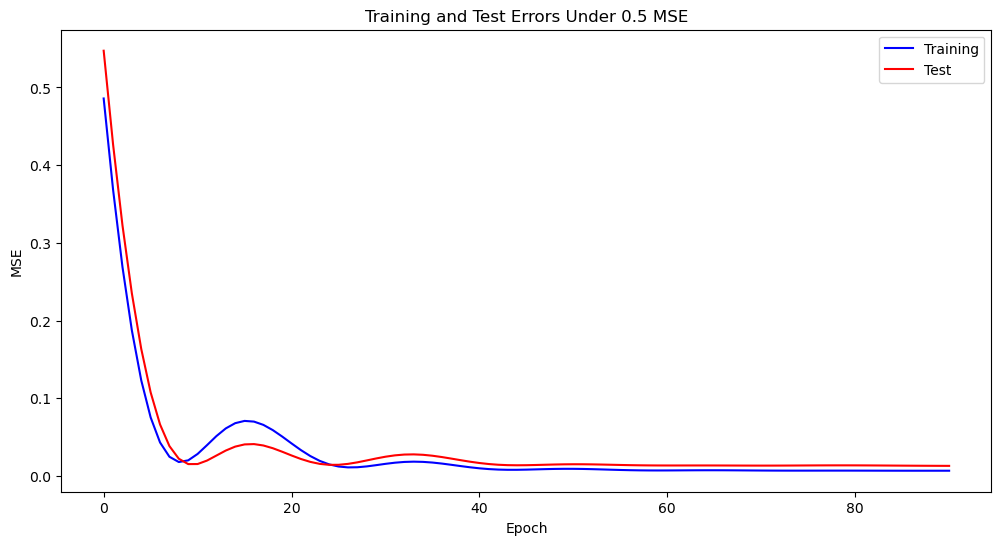

In [19]:
np.random.seed(42)
torch.manual_seed(42)

scaler = MinMaxScaler()
deposit_data.loc[:, [mineral] +covariates] = scaler.fit_transform(deposit_data.loc[:,[mineral] + covariates])

x = deposit_data[covariates].values  # Use X, Y, and Z coordinates
y = deposit_data[mineral].values[:, np.newaxis]  # Keep mineral as the output
x = x.reshape(len(deposit_data), len(covariates))

x = torch.tensor(x)
y = torch.tensor(y)
x = x.to(torch.float32)
y = y.to(torch.float32)

# Determine the unique 'Name' values
unique_names = deposit_data['Name'].unique()

# Initialize empty lists to store training and testing data
x_train = []
y_train = []
x_test = []
y_test = []

# Iterate through unique 'Name' values and assign each hole's data to either train or test
for name in unique_names:
    # Select data for the current hole
    hole_data = deposit_data[deposit_data['Name'] == name]
    x_hole = hole_data[covariates].values
    y_hole = hole_data['Density_gcm3'].values

    # Assign the hole's data to either train or test
    if np.random.rand() < 0.2:  # You can adjust the ratio, e.g., 0.2 for a 80/20 split
        x_test.extend(x_hole)
        y_test.extend(y_hole)
    else:
        x_train.extend(x_hole)
        y_train.extend(y_hole)

# Convert the lists to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


model = nn.Sequential(
    nn.Linear(in_features=3, out_features=500),
    nn.ReLU(),
    nn.Linear(in_features=500, out_features=1)
)

mse_loss = nn.MSELoss()
#Apparently lr=0.005 is better than 0.01 and than 0.001: quicker and better convergence
#optimizer = optim.Adam(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []  # To store training losses during training
test_losses = []   # To store test losses during training

for step in range(91):
    pre = model(x_train)
    mse = mse_loss(pre, y_train)
    cost = mse

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    pre_train = model(x_train)
    mse_train = mse_loss(pre_train, y_train)
    train_losses.append(mse_train.item())

    # Evaluate the model on the test set
    pre_test = model(x_test)
    mse_test = mse_loss(pre_test, y_test)
    test_losses.append(mse_test.item())

    if step % 100 == 0:
        print(f'- Iteration {step}, MSE: {mse.item():.4f}')


# Create a plot showing only values under 0.2 on the y-axis
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training', color='blue')
plt.plot(test_losses, label='Test', color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.ylim(0, 0.2)  # Set the y-axis limit to filter values under 0.05
plt.legend()
plt.title('Training and Test Errors Under 0.2 MSE')
plt.show()



# Create a plot showing only values under 0.05 on the y-axis
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training', color='blue')
plt.plot(test_losses, label='Test', color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.ylim(0, 0.05)  # Set the y-axis limit to filter values under 0.05
plt.legend()
plt.title('Training and Test Errors Under 0.05 MSE')
plt.show()

# Create a plot showing only values under 0.2 on the y-axis
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training', color='blue')
plt.plot(test_losses, label='Test', color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
#plt.ylim(0, 0.5)  # Set the y-axis limit to filter values under 0.05
plt.legend()
plt.title('Training and Test Errors Under 0.5 MSE')
plt.show()










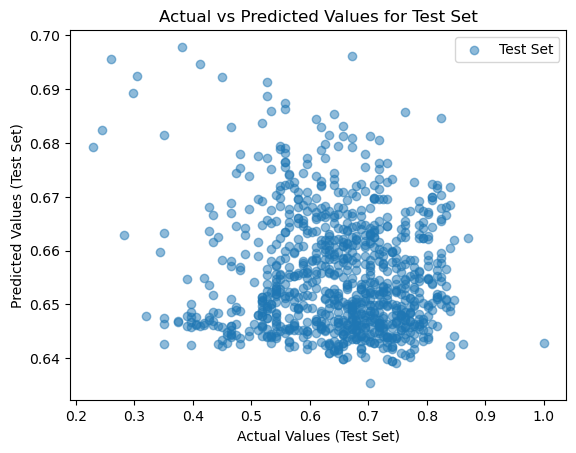

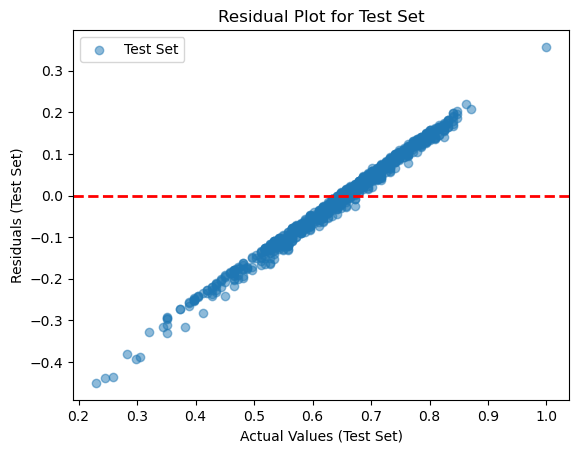

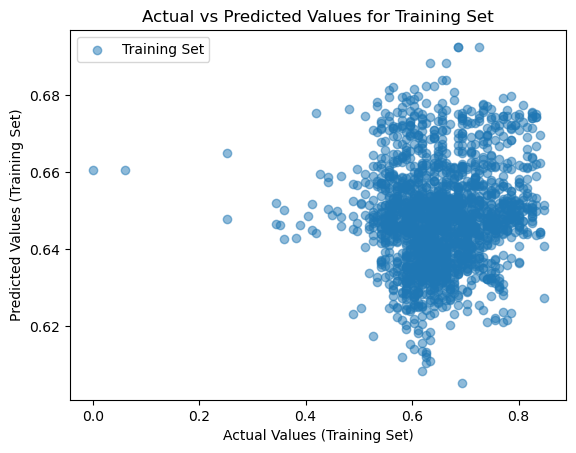

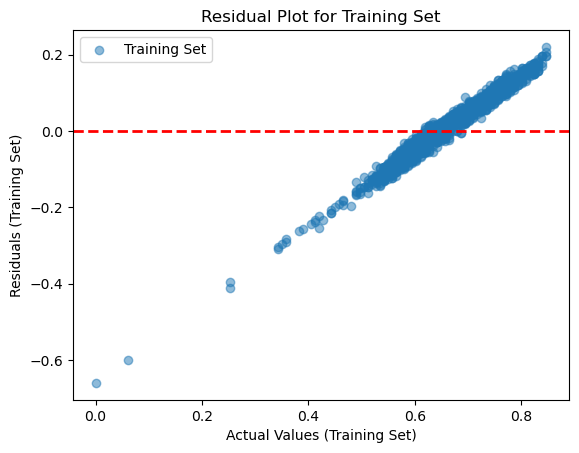

Metrics for Test set:
  MSE: 0.0130
  RMSE: 0.1139
  MAE: 0.0908
  R^2: -0.0359

Metrics for Training set:
  MSE: 0.0067
  RMSE: 0.0820
  MAE: 0.0628
  R^2: -0.0036



In [20]:
import matplotlib.pyplot as plt

# Generate predictions for the test set
test_predictions = model(x_test)

# Convert torch tensors to NumPy arrays
y_test_np = y_test.numpy()
test_predictions_np = test_predictions.detach().numpy()

# Plot actual vs predicted values for the test set
plt.scatter(y_test_np, test_predictions_np, alpha=0.5, label='Test Set')
plt.xlabel('Actual Values (Test Set)')
plt.ylabel('Predicted Values (Test Set)')
plt.title('Actual vs Predicted Values for Test Set')
plt.legend()
plt.show()

# Calculate residuals for the test set
test_residuals = y_test_np - test_predictions_np

# Plot residuals for the test set
plt.scatter(y_test_np, test_residuals, alpha=0.5, label='Test Set')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.xlabel('Actual Values (Test Set)')
plt.ylabel('Residuals (Test Set)')
plt.title('Residual Plot for Test Set')
plt.legend()
plt.show()

# Generate predictions for the training set
train_predictions = model(x_train)

# Convert torch tensors to NumPy arrays
y_train_np = y_train.numpy()
train_predictions_np = train_predictions.detach().numpy()

# Plot actual vs predicted values for the training set
plt.scatter(y_train_np, train_predictions_np, alpha=0.5, label='Training Set')
plt.xlabel('Actual Values (Training Set)')
plt.ylabel('Predicted Values (Training Set)')
plt.title('Actual vs Predicted Values for Training Set')
plt.legend()
plt.show()

# Calculate residuals for the training set
train_residuals = y_train_np - train_predictions_np

# Plot residuals for the training set
plt.scatter(y_train_np, train_residuals, alpha=0.5, label='Training Set')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.xlabel('Actual Values (Training Set)')
plt.ylabel('Residuals (Training Set)')
plt.title('Residual Plot for Training Set')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to print evaluation metrics
def print_metrics(actual, predicted, set_name):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f"Metrics for {set_name} set:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R^2: {r2:.4f}\n")

# Print metrics for the test set
print_metrics(y_test_np, test_predictions_np, "Test")

# Print metrics for the training set
print_metrics(y_train_np, train_predictions_np, "Training")


C:\Users\23478671\AppData\Local\Temp\ipykernel_3556\2766523882.py:32: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\23478671\AppData\Local\Temp\ipykernel_3556\2766523882.py:33: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\23478671\AppData\Local\Temp\ipykernel_3556\2766523882.py:34: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

C:\Users\23478671\AppData\Local\Temp\ipykernel_3556\2766523882.py:35: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().

- Iteration 0, MSE: 0.2221


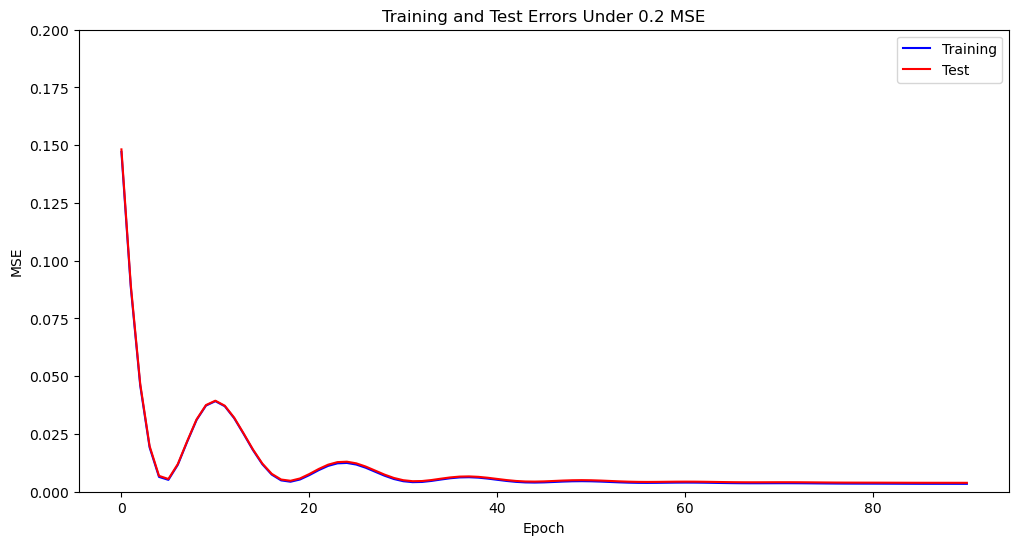

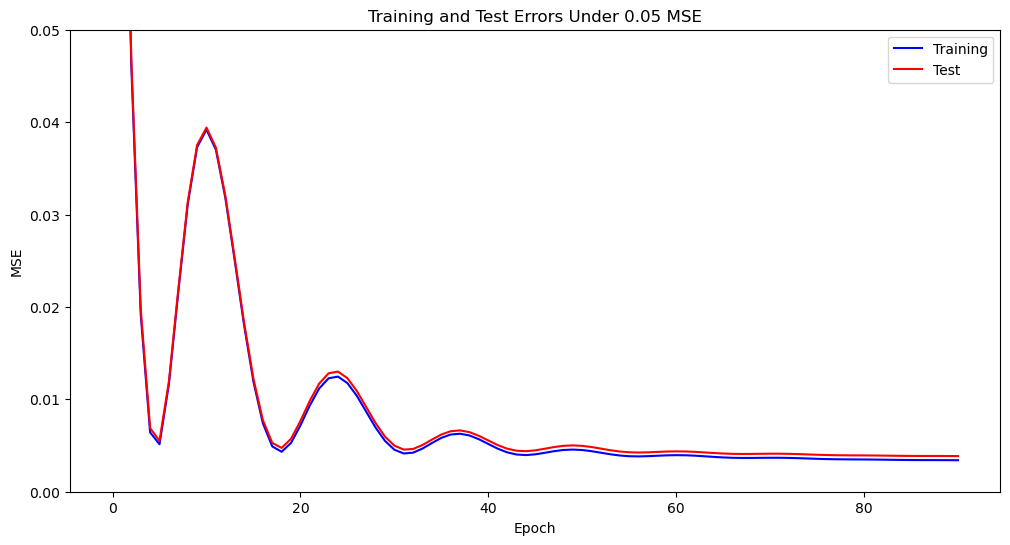

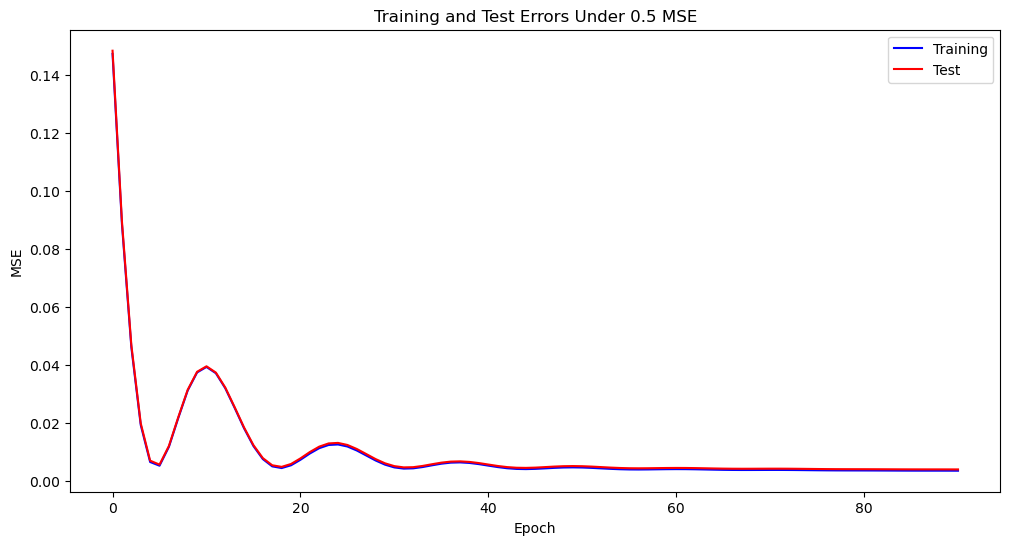

In [42]:
np.random.seed(42)
torch.manual_seed(42)

scaler = MinMaxScaler()
deposit_data.loc[:, [mineral] +covariates] = scaler.fit_transform(deposit_data.loc[:,[mineral] + covariates])

x = deposit_data[covariates].values  # Use X, Y, and Z coordinates
y = deposit_data[mineral].values[:, np.newaxis]  # Keep mineral as the output
x = x.reshape(len(deposit_data), len(covariates))

x = torch.tensor(x)
y = torch.tensor(y)
x = x.to(torch.float32)
y = y.to(torch.float32)

# Determine the unique 'Name' values
unique_names = deposit_data['Name'].unique()

# Determine the size of the test set (e.g., 20% of the data)
test_size = int(0.2 * len(x))

# Generate random indices for the test set
test_indices = np.random.choice(len(x), size=test_size, replace=False)

# Create train and test sets based on the indices
x_train = x[np.setdiff1d(np.arange(len(x)), test_indices)]
y_train = y[np.setdiff1d(np.arange(len(y)), test_indices)]

x_test = x[np.sort(test_indices)]
y_test = y[np.sort(test_indices)]

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

model = nn.Sequential(
    nn.Linear(in_features=5, out_features=500),
    nn.ReLU(),
    nn.Linear(in_features=500, out_features=1)
)

mse_loss = nn.MSELoss()
#Apparently lr=0.005 is better than 0.01 and than 0.001: quicker and better convergence
#optimizer = optim.Adam(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []  # To store training losses during training
test_losses = []   # To store test losses during training

for step in range(91):
    pre = model(x_train)
    mse = mse_loss(pre, y_train)
    cost = mse

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    pre_train = model(x_train)
    mse_train = mse_loss(pre_train, y_train)
    train_losses.append(mse_train.item())

    # Evaluate the model on the test set
    pre_test = model(x_test)
    mse_test = mse_loss(pre_test, y_test)
    test_losses.append(mse_test.item())

    if step % 100 == 0:
        print(f'- Iteration {step}, MSE: {mse.item():.4f}')


# Create a plot showing only values under 0.2 on the y-axis
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training', color='blue')
plt.plot(test_losses, label='Test', color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.ylim(0, 0.2)  # Set the y-axis limit to filter values under 0.05
plt.legend()
plt.title('Training and Test Errors Under 0.2 MSE')
plt.show()



# Create a plot showing only values under 0.05 on the y-axis
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training', color='blue')
plt.plot(test_losses, label='Test', color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.ylim(0, 0.05)  # Set the y-axis limit to filter values under 0.05
plt.legend()
plt.title('Training and Test Errors Under 0.05 MSE')
plt.show()

# Create a plot showing only values under 0.2 on the y-axis
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training', color='blue')
plt.plot(test_losses, label='Test', color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
#plt.ylim(0, 0.5)  # Set the y-axis limit to filter values under 0.05
plt.legend()
plt.title('Training and Test Errors Under 0.5 MSE')
plt.show()










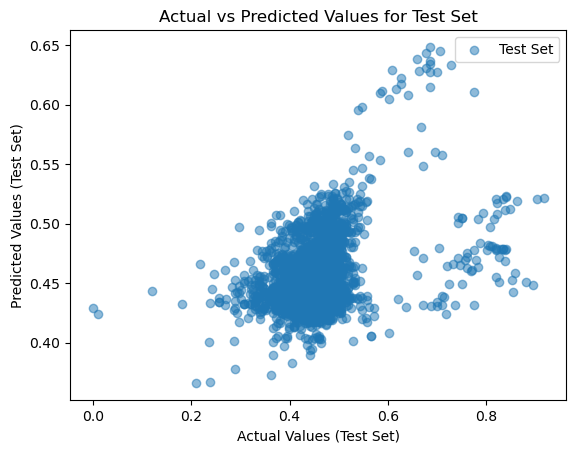

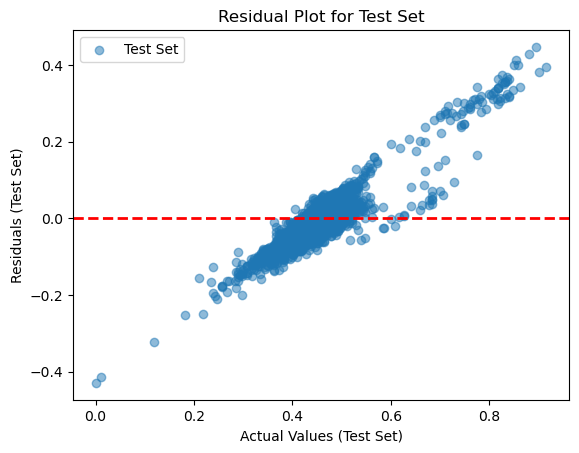

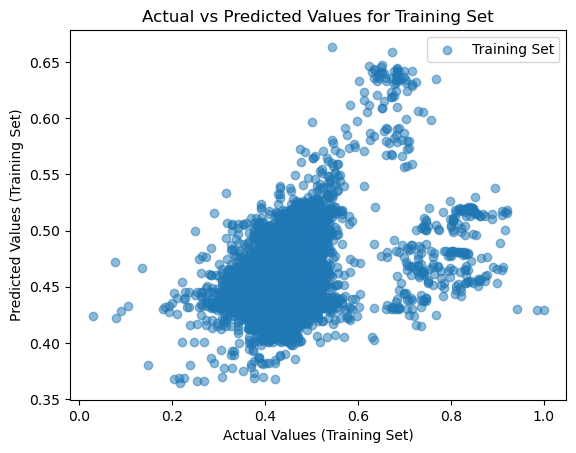

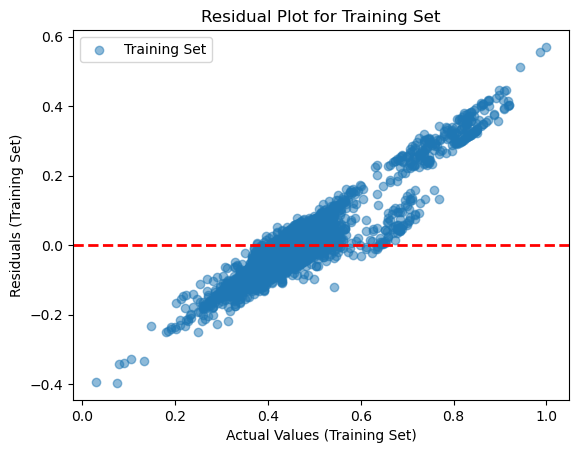

Metrics for Test set:
  MSE: 0.0039
  RMSE: 0.0621
  MAE: 0.0379
  R^2: 0.1426

Metrics for Training set:
  MSE: 0.0034
  RMSE: 0.0584
  MAE: 0.0362
  R^2: 0.1500



In [43]:
import matplotlib.pyplot as plt

# Generate predictions for the test set
test_predictions = model(x_test)

# Convert torch tensors to NumPy arrays
y_test_np = y_test.numpy()
test_predictions_np = test_predictions.detach().numpy()

# Plot actual vs predicted values for the test set
plt.scatter(y_test_np, test_predictions_np, alpha=0.5, label='Test Set')
plt.xlabel('Actual Values (Test Set)')
plt.ylabel('Predicted Values (Test Set)')
plt.title('Actual vs Predicted Values for Test Set')
plt.legend()
plt.show()

# Calculate residuals for the test set
test_residuals = y_test_np - test_predictions_np

# Plot residuals for the test set
plt.scatter(y_test_np, test_residuals, alpha=0.5, label='Test Set')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.xlabel('Actual Values (Test Set)')
plt.ylabel('Residuals (Test Set)')
plt.title('Residual Plot for Test Set')
plt.legend()
plt.show()

# Generate predictions for the training set
train_predictions = model(x_train)

# Convert torch tensors to NumPy arrays
y_train_np = y_train.numpy()
train_predictions_np = train_predictions.detach().numpy()

# Plot actual vs predicted values for the training set
plt.scatter(y_train_np, train_predictions_np, alpha=0.5, label='Training Set')
plt.xlabel('Actual Values (Training Set)')
plt.ylabel('Predicted Values (Training Set)')
plt.title('Actual vs Predicted Values for Training Set')
plt.legend()
plt.show()

# Calculate residuals for the training set
train_residuals = y_train_np - train_predictions_np

# Plot residuals for the training set
plt.scatter(y_train_np, train_residuals, alpha=0.5, label='Training Set')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.xlabel('Actual Values (Training Set)')
plt.ylabel('Residuals (Training Set)')
plt.title('Residual Plot for Training Set')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to print evaluation metrics
def print_metrics(actual, predicted, set_name):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f"Metrics for {set_name} set:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R^2: {r2:.4f}\n")

# Print metrics for the test set
print_metrics(y_test_np, test_predictions_np, "Test")

# Print metrics for the training set
print_metrics(y_train_np, train_predictions_np, "Training")
